i) test whether two data sets are compatible to originate from same decay time distribution. Is it the decay of the same nucleus?
ii) Estimate lifetime and its uncertainty for each data set 


Ks_2sampResult(statistic=0.125, pvalue=0.24230268903119878)
KS Distance: 0.125000
P_KS: 0.248548


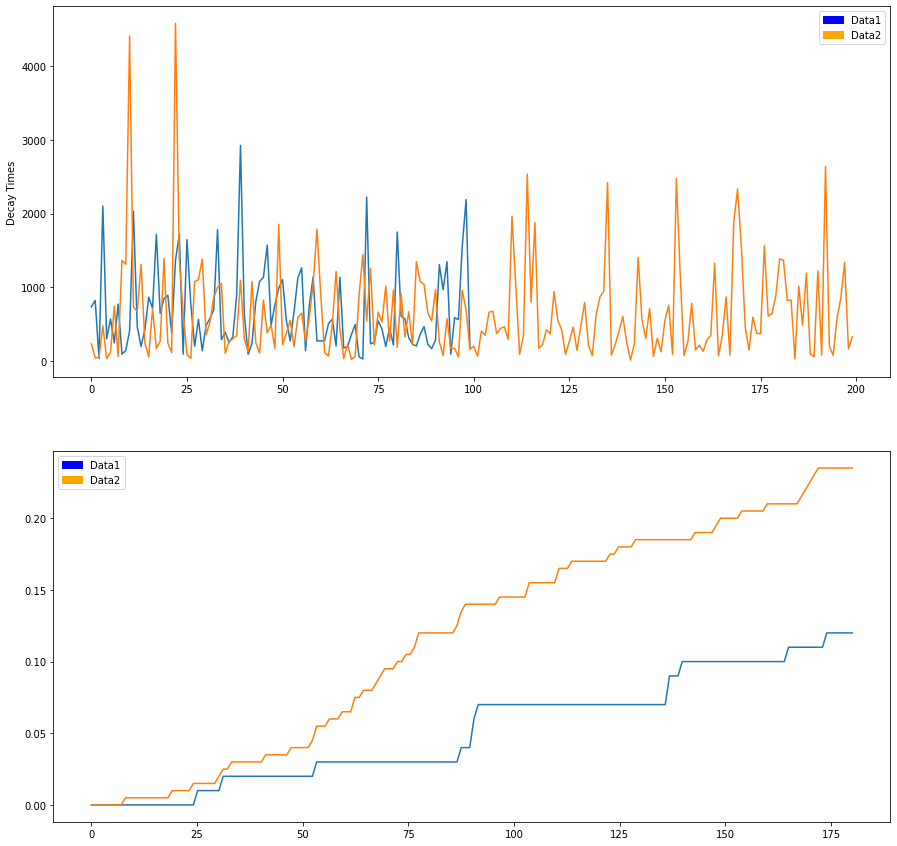

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.special import kolmogorov
from scipy.stats import kstwobign
import matplotlib.patches as mpatches
from scipy.stats import expon

D_1 = np.loadtxt('nucl_sample1.txt')
D_2 = np.loadtxt('nucl_sample2.txt')
Data1 = D_1.tolist()
Data2 = D_2.tolist()
Data3 = Data1 + Data2 

Data1_sorted = np.sort(Data1)
Data2_sorted = np.sort(Data2)
#Data3_sorted = np.sort(Data3)

kst = stats.ks_2samp(Data1, Data2)
print(kst)

Datay1 = np.linspace(1/len(Data1), 1, len(Data1))
Datay2 = np.linspace(1/len(Data2), 1, len(Data2))

F1 = interp1d(np.sort(Data1), Datay1, kind="previous", bounds_error = False,fill_value = (0,1)) #interpolation for Data set 1
F2 = interp1d(np.sort(Data2), Datay2, kind="previous", bounds_error = False,fill_value = (0,1)) #interpolation for data set 2

diffmax =0
for deg in Data1+Data2:
    diff = np.abs(F1(deg)-F2(deg))
    diffmax= diff if diff > diffmax else diffmax

    
print('KS Distance: %f' %diffmax) 

S = np.sqrt((len(Data1)*len(Data2)) / (len(Data1)+len(Data2))) #(i.e big sqrt)
P_KS = kolmogorov(diffmax*S) #here we dont use 1- F_k because kolmogorov from scipy gives the complementary cum dist
print('P_KS: %f' %P_KS) #ii

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,15))

ax1.plot(Data1)
ax1.plot(Data2)
ax1.set_ylabel('Decay Times')
blue_patch = mpatches.Patch(color='blue', label='Data1')
orange_patch = mpatches.Patch(color='orange', label='Data2')
ax1.legend(handles=[blue_patch, orange_patch])

x = np.linspace(0,180,180)


ax2.plot(x,F1(x))
ax2.plot(x,F2(x))
ax2.legend(handles=[blue_patch, orange_patch])



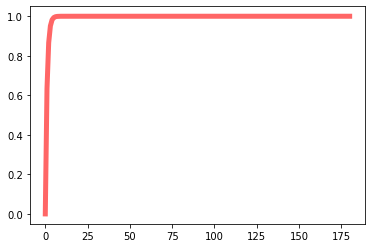

In [42]:
y = np.linspace(expon.ppf(0.01),
                expon.ppf(0.99), 100)
plt.plot(x, expon.cdf(x),
       'r-', lw=5, alpha=0.6, label='expon pdf')

In [58]:
import matplotlib . pyplot as plt
import numpy as np
from scipy . special import kolmogorov

def cum_expf(x, lam):
    return 1-np.exp(-lam*x)

data1 = D_1
data2 = D_2
# convert all angles in radians

#data1 = [ theta * np . pi /180. for theta in data1 ]
#data2 = [ theta * np . pi /180. for theta in data2 ]
# calculate the cumulative probability function for both sets

bins = np . linspace (0., 5000 , 200)
hist_data1 , bins_data = np . histogram ( data1 , bins = bins )
hist_data2 , bins_data = np . histogram ( data2 , bins = bins )
norm_cumul_data1 = np . cumsum ( hist_data1 )/ len( data1 )
norm_cumul_data2 = np . cumsum ( hist_data2 )/ len( data2 )
# ... and cumulative probability for the combination of both sets

hist_data_sum , bins_data = np . histogram ( data1 + data2 , bins = bins )
norm_cumul_data_sum = np . cumsum ( hist_data_sum )/ len ( data1 + data2 )
bins = bins [0: -1] # skip the last bin (= max range )

# a bit of plotting
fig = plt . figure (1)
plt . step ( bins , norm_cumul_data1 , label ='data 1')
plt . step ( bins , norm_cumul_data2 , label ='data 2')
plt . xlabel ('Recoil angle $\\ theta$ (rad )')
plt . ylabel ('Cumulative distribution function')
plt . legend ( loc ='best')
plt . show ()
# distance

fig = plt . figure (2)
plt . plot ( bins , abs ( norm_cumul_data1 - norm_cumul_data2 ))
plt . xlabel ('x')
plt . ylabel ('y')
plt . show ()

# exercise i)
def ksDistance ( arr1 , arr2 ):
    if len ( arr1 ) != len( arr2 ):
        raise ValueError ('The two arrays must be of same multiplicity')
    return max ([ abs ( arr1 [i ]- arr2 [i ]) for i in range ( len( arr1 ))])

ks_distance = ksDistance ( norm_cumul_data1 , norm_cumul_data2 )
print ('KS - distance :', ks_distance )

# exercise ii)

prob = kolmogorov ( ks_distance * np . sqrt (len ( data1 )* len( data2 )/( len( data1 )+ len ( data2 ))))
print ('P- value :', prob )

# exercise iii )

def modCDF ( x, lam):
    return 1-np.exp(-lam*x)

# a bit of plotting ( combined measurements + model )

model_cumul = modCDF ( bins )
fig = plt . figure (3)
plt . step ( bins , norm_cumul_data_sum , label ='IMB + KAM')
plt . plot ( bins , model_cumul , label ='Prediction')
plt . xlabel ('Recoil angle $\\ theta$ (rad )')
plt . ylabel ('Cumulative distribution function ( both datasets )')
plt . legend ( loc ='best')
plt . show ()
ks_distance_mod = ksDistance ( norm_cumul_data_sum , model_cumul )
print ('KS - distance [ model ]:', ks_distance_mod )
# exercise iv)
prob_mod = kolmogorov ( ks_distance_mod * np . sqrt ( len( data1 )+ len ( data2 )))
print ('P- value [ model ]:', prob_mod )

ValueError: operands could not be broadcast together with shapes (100,) (200,) 

In [55]:
print((max(D_2)))
print((max(D_1)))

4584.0
2925.0
